<a href="https://colab.research.google.com/github/amitabhswain/CIFAR-Classification-using-Neural-Networks./blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


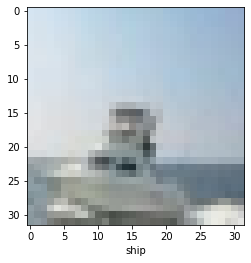

In [ ]:
index = 100

plt.imshow(train_images[index], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[index][0]])
plt.show()


In [ ]:
train_images.shape

(50000, 32, 32, 3)

# Simple NN 


In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (32, 32, 3)),
                          keras.layers.Dense(256, activation = "relu"),
                          keras.layers.Dense(128, activation = "relu"),
                          keras.layers.Dense(10, activation = "softmax")
])

NameError: ignored

In [ ]:
model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [ ]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8599 - accuracy: 0.3289
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6791 - accuracy: 0.3971
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6056 - accuracy: 0.4242
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5573 - accuracy: 0.4398
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5241 - accuracy: 0.4569


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose = 1)
print('Test accuracy:', test_acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 1.5117 - accuracy: 0.4682
Test accuracy: 46.81999981403351


# CNN

In [ ]:
cnn_model = keras.models.Sequential([
                              keras.layers.Conv2D(32, (3, 3), padding='same', activation = "relu", input_shape = (32, 32, 3)),
                              keras.layers.BatchNormalization(),
                              keras.layers.MaxPooling2D((3, 3)),
                              keras.layers.Conv2D(64, (3, 3), padding = 'same',activation = "relu"),
                              keras.layers.BatchNormalization(),
                              keras.layers.MaxPooling2D((3, 3)), 
                              keras.layers.Conv2D(128, (3, 3),padding='same', activation = "relu"),
                              keras.layers.BatchNormalization(),
                              keras.layers.MaxPooling2D((3, 3)), 
])

In [ ]:
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(128, activation='relu'))
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)        

In [ ]:
cnn_model.compile(optimizer='Adam',loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
cnn_model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2913 - accuracy: 0.5436 - val_loss: 1.0384 - val_accuracy: 0.6288
Epoch 2/4
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9599 - accuracy: 0.6655 - val_loss: 1.0508 - val_accuracy: 0.6296
Epoch 3/4
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8244 - accuracy: 0.7125 - val_loss: 1.0886 - val_accuracy: 0.6383
Epoch 4/4
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7323 - accuracy: 0.7444 - val_loss: 0.8492 - val_accuracy: 0.7092


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc*100)

313/313 - 4s - loss: 0.8492 - accuracy: 0.7092
Test accuracy: 70.92000246047974


# CNN gives decent accuracy with cifar10 dataset.